# CPS2.1 - Computer Problem Set 2.1
### **The Black-Scholes Hedging Strategy**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Constants
T = 1.5
N = 1000 # Number of samples
S0 = 100 # Initial stock price
n = 10 # Number of steps
sigma = 0.3 # Volatility
r = 0.05 # Risk-free rate
list_nu = [0.02,0.05,0.45]

# Brownian Motion Path
def create_W(M,n,T):
    W = np.zeros((n+1,M))
    dt = T/n
    W[1:n+1,:] = np.sqrt(dt)*np.random.randn(n,M)
    W = np.cumsum(W,axis=0)
    return W

In [24]:
def St(S0,nu,sigma,W,t):
    return (S0*np.exp((nu-0.5*sigma**2)*t+sigma*W[t,:]))

### 1 -  Discrete paths simulations

In [34]:
def sampling_1(S0,nu,sigma,T,n,N):
    dt = T/n
    W = create_W(N,n,T)
    S = np.zeros((n+1,N))
    S[0,:] = S0
    for t in range(1,n+1):
        for i in range(N):
            S[t,i] = St(S0,nu,sigma,W,t)[i]
    return S,W

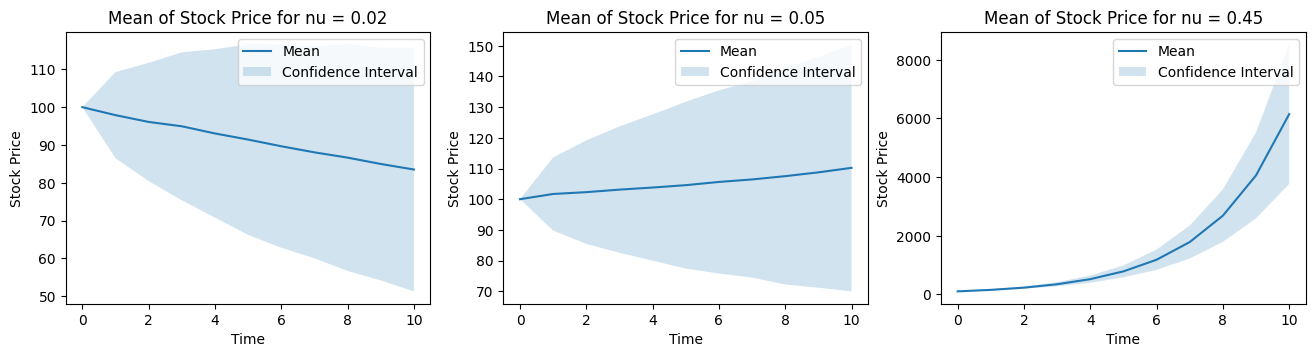

In [63]:
plt.figure(figsize=(16,12))
fig=1
for nu in list_nu:
    S_1,W = sampling_1(S0,nu,sigma,T,n,N)
    mean = np.mean(S_1,axis=1)
    variance = np.std(S_1,axis=1)
    plt.subplot(3,3,fig)
    plt.plot(mean)
    plt.fill_between(range(n+1),mean-variance,mean+variance,alpha=0.2)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend(['Mean','Confidence Interval'])
    plt.title('Mean of Stock Price for nu = '+str(nu))
    fig+=1
plt.show()

Comment 

### 2 - Black-scholes formula

In [52]:
N=1000
K_list = range(100,121)

def d_plus(s,k,v):
    return (np.log(s/k)/np.sqrt(v) + 0.5 * np.sqrt(v))

def d_minus(s,k,v):
    return (np.log(s/k)/np.sqrt(v) - 0.5 * np.sqrt(v))

def BS(S0,K,T,r,sigma):
    #  Black-Scholes formula for European call option
    return (S0*np.norm.cdf(d_plus(S0,K*np.exp(-r*T),sigma**2*T)) - K*np.exp(-r*T)*np.norm.cdf(d_minus(S0,K*np.exp(-r*T),sigma**2*T)))

def Delta(St,K,t,T,r,sigma):
    return np.norm.cdf(d_plus(St,K*np.exp(-r*(T-t)),sigma**2*(T-t)))

def Xnt(K,S) :
    out = np.exp(r*T) * BS(S0,K,T,r,sigma)
    sum_0 = 0
    for i in range(1,n+1):
        sum_0 += Delta(St

In [ ]:
for nu in list_nu:
    Xnt_list = []
    